In [5]:
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP

Outline:

* Get constants:
    * $c_p$ water
    * working fluids
    * typical ocean temps  
* Calc heat flow in from the resivoirs
    * assume adiabatic heat transfer
         * cold water, $Q_\text{out} = \Delta T \cdot c_p \cdot \dot{m}$
             * $\Delta T$ is the temp increase of the cold water (3C) and other constants are for water
         * warm water, $Q_\text{in} = \Delta T \cdot UA$
             * $\Delta T$ is average fluid temp difference, $UA$ is overall heat transfer coef
* Figure out how many missing puzzle pieces there are:
    * ex: working fluid operating pressure
* Use coolprop to fill in the blanks from given info and missing puzzle pieces that are swept variables
* measure efficiency 

In [6]:
cp_water = 4180
m_dot_cold =450
m_dot_hot = 900

temps = np.linspace()

Qin1 = UA_hot * np.mean(temps)
Qout = 3 * cp_water * m_dot_cold

TypeError: _linspace_dispatcher() missing 2 required positional arguments: 'start' and 'stop'

In [10]:
sub = 'NH3'

# Assume that the working fluid reaches thermal equilibrium with T_h and T_c
# Assume that cycle is ideal (no superheating)
# Really, what we should do is make a toy model for the efficiency of heat exchangers.
# TODO: look up typical operating pressures and temperatures to validate model

# State 1: Exiting Evaporator
t1 = 26 + 273
q1 = 1
h1 = CP.PropsSI('H', 'Q', q1, 'T', t1, sub)
s1 = CP.PropsSI('S', 'Q', q1, 'T', t1, sub)

# State 2: Exiting the turbine
s2 = s1
t2 = 5 + 273
h2 = CP.PropsSI('H', 'S', s2, 'T', t2, sub)

# State 3: Exiting Condensor
p3 = 6.25e5
q3 = 0
t3 = t2
h3 = CP.PropsSI('H', 'Q', q3, 'P', p3, sub)
s3 = CP.PropsSI('S', 'Q', q3, 'P', p3, sub)

# State 4: Exiting Pump
s4 = s3
p4 = CP.PropsSI('P', 'Q', q1, 'T', t1, sub)
h4 = CP.PropsSI('H', 'S', s4, 'P', p4, sub)
t4 = CP.PropsSI('T', 'H', h4, 'S', s4, sub)



Power out to Power in:  132.83142003280622


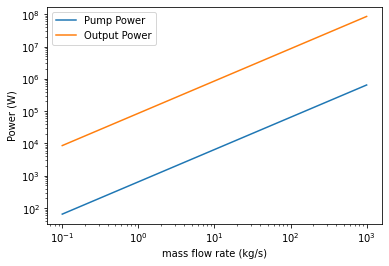

In [11]:
m_dots = np.logspace(-1, 3, 10)
W_outs = (h1 - h2) * m_dots

W_pumps = (h4 - h3) * m_dots
plt.figure
plt.loglog(m_dots, W_pumps)
plt.loglog(m_dots, W_outs)
plt.legend(['Pump Power', 'Output Power'])
plt.xlabel('mass flow rate (kg/s)')
plt.ylabel('Power (W)')

print('Power out to Power in: ', np.mean(W_outs / W_pumps))

278 283.71816547455626


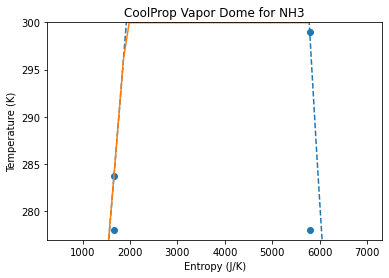

In [16]:
sub = 'NH3'
ts = np.linspace(273-50, 273+250, 350)
qs1 = np.zeros_like(ts)
qs2 = np.ones_like(ts)

ss1 = CP.PropsSI('S', 'T', ts, 'Q', qs1, sub)
ss2 =CP.PropsSI('S', 'T', ts, 'Q', qs2, sub)

min_s = np.min(ss1)
max_s = np.max(ss2)

ss = np.linspace(1000, 7000, 50)

plt.plot(np.concatenate((ss1, ss2)), np.concatenate((ts,ts)), '--')
plt.scatter([s1, s2, s3, s4], [t1,t2,t3,t4])
plt.xlabel('Entropy (J/K)')
plt.ylabel('Temperature (K)')
plt.title('CoolProp Vapor Dome for ' + sub)

ps = CP.PropsSI('T', 'P', np.ones_like(ss) * 1.06e+06, 'S', ss, sub)
plt.plot(ss,ps)
plt.ylim([min([t1,t2,t3,t4])-1, max([t1,t2,t3,t4])+1])
print(t3, t4)

In [8]:
sub = 'NH3'
# ts = np.linspace(273-50, 273+250, 30)
ss = np.linspace(1000, 7000, 30)

ps = CP.PropsSI('P', 'T', np.ones_like(ss) * 300, 'S', ss, sub)
# ss2 =CP.PropsSI('S', 'T', ts, 'Q', qs2, sub)


In [9]:
print(ps)

[5.59346071e+08 3.67342897e+08 2.15982359e+08 1.03363943e+08
 2.58297858e+07 1.06112150e+06 1.06112150e+06 1.06112150e+06
 1.06112150e+06 1.06112150e+06 1.06112150e+06 1.06112150e+06
 1.06112150e+06 1.06112150e+06 1.06112150e+06 1.06112150e+06
 1.06112150e+06 1.06112150e+06 1.06112150e+06 1.06112150e+06
 1.06112150e+06 1.06112150e+06 1.06112150e+06 1.06112150e+06
 8.07922132e+05 5.76711711e+05 4.01261260e+05 2.73943955e+05
 1.84509122e+05 1.23108841e+05]


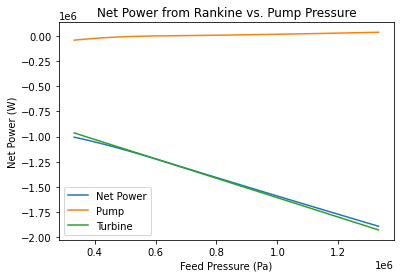

In [48]:
sub = 'NH3'
subs = ['R1234yf', 'r1234ze', 'NH3', 'r125', 'isobutene', 're143a', 'propane', 'r134a', 'r161', 'r152a'] 

t_cold = 5 + 273
t_hot = 30 + 273
t_pinch = 5

p_base = 666000
mdot_base = 22.29
low_lim = 0.5
up_lim = 2

u_cond = 900
u_evap = 620

# Pump Pressure
ps = np.linspace(p_base * low_lim, p_base * up_lim, 100)
m_dots = np.linspace(mdot_base * low_lim**0.5, mdot_base * up_lim**0.5, 100)

# State 1: Exiting Evaporator
t1 = t_hot - t_pinch
q1 = 1
h1 = CP.PropsSI('H', 'Q', q1, 'T', t1, sub)
s1 = CP.PropsSI('S', 'Q', q1, 'T', t1, sub)
# p1 = CP.PropsSI('P', 'Q', q1, 'T', t1, sub)

# State 2: Exiting the turbine
s2 = s1
t2 = t_cold + t_pinch
# t2 = 23.3 + 273
h2 = CP.PropsSI('H', 'S', s2, 'T', t2, sub)

# State 3: Exiting Condenser
q3 = 0
t3 = t2
h3 = CP.PropsSI('H', 'Q', q3, 'T', t3, sub)
s3 = CP.PropsSI('S', 'Q', q3, 'T', t3, sub)

# State 4: Exiting Pump
s4 = s3
p4 = ps
h4 = CP.PropsSI('H', 'S', s4, 'P', p4, sub)
t4 = CP.PropsSI('T', 'H', h4, 'S', s4, sub)

W_pump = m_dots * (h4 - h3)
W_turb = m_dots * (h2 - h1)

W_net = W_turb + W_pump

plt.title('Net Power from Rankine vs. Pump Pressure')
plt.ylabel('Net Power (W)')
plt.xlabel('Feed Pressure (Pa)')
plt.plot(ps, W_net)
plt.plot(ps, W_pump)
plt.plot(ps, W_turb)
plt.legend(['Net Power', 'Pump', 'Turbine'])


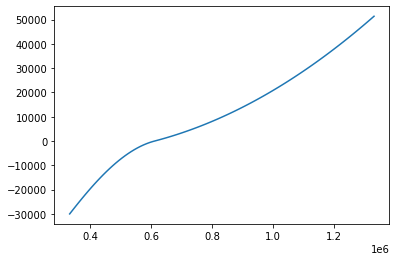

In [45]:
plt.figure
plt.plot(ps, W_pump)

## 04/21/2021
